In [ ]:
import numpy as np #Import necessary packages
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
dataset_104 = pd.read_csv(r"https://drive.google.com/file/d/1leAdk6TelDtti13cG9iDbNMXut0eHX2m/view?usp=drive_link")
dataset_152 = pd.read_csv(r"https://drive.google.com/file/d/1eNWC717ovh4G1E-mH0nlnhZxGiYMahY3/view?usp=drive_link")
dataset_279 = pd.read_csv(r'https://drive.google.com/file/d/1mg0QXWZIYP5iRapWtGi9riHwwrXIBLd1/view?usp=drive_link') #Import three surfactant datasets

dataset_104 = dataset_104.rename({' cid': 'cid'}, axis = 1)
dataset_152 = dataset_152.rename({' cid': 'cid'}, axis = 1)
dataset_279 = dataset_279.rename({' cid': 'cid'}, axis = 1) #Correct column label

In [ ]:
surfactants_286 = pd.concat([dataset_104, dataset_152, dataset_279]) #Merge 3 surfactant datasets
surfactants_286 = surfactants_286.drop_duplicates()
surfactants_286['cid'].to_clipboard(excel=True, sep=None, index=False, header=None) #Copy CID values for 286 surfactants to clipboard

In [ ]:
all_molecules = pd.read_csv(r'https://drive.google.com/file/d/1Fq0ogGuOBGTKIIuqGUlCcaj1_XXOD_yc/view?usp=drive_link') #Import dataset for all molecules

all_molecules.shape[0] #324493 rows!

all_molecules_cid = all_molecules['cid'] #Select CID column for each dataframe

surfactants_286_cid = surfactants_286['cid']

all_molecules_minus_surfactants= pd.concat([all_molecules_cid, surfactants_286_cid]).drop_duplicates(keep=False) #Remove surfactant CID values

all_molecules_minus_surfactants.to_csv('all_molecules_minus_surfactants', index=False, header=False) #Save CID values for 324,483 non surfactants to csv

/var/folders/d8/jv5dw96x097697vhvtvv5m9w0000gn/T/ipykernel_75457/1173184496.py:1: DtypeWarning: Columns (31,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  all_molecules = pd.read_csv(r'/Users/carlyfwelsh/Documents/Angus Data Science/all_molecules.csv') #Import dataset for all molecules


In [ ]:
non_surfactants_286 = all_molecules_minus_surfactants.sample(286) #Too many datapoints so select 286 random molecules to match the 286 surfactant molecules

non_surfactants_286.to_csv('non_surfactants_286', index=False, header=False) #Save CID values for 286 non surfactants to csv

In [ ]:
all_molecules.info() #Inspect dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324493 entries, 0 to 324492
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cid                     324493 non-null  int64  
 1   cmpdname                324493 non-null  object 
 2   cmpdsynonym             320337 non-null  object 
 3   mw                      324493 non-null  float64
 4   mf                      324493 non-null  object 
 5   polararea               324493 non-null  float64
 6   complexity              324493 non-null  float64
 7   xlogp                   297654 non-null  float64
 8   heavycnt                324493 non-null  int64  
 9   hbonddonor              324493 non-null  int64  
 10  hbondacc                324493 non-null  int64  
 11  rotbonds                324493 non-null  int64  
 12  inchi                   324493 non-null  object 
 13  isosmiles               324493 non-null  object 
 14  canonicalsmiles     

In [ ]:
surfactants_286.info() #Inspect dataset

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 278
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cid                     286 non-null    int64  
 1   cmpdname                286 non-null    object 
 2   cmpdsynonym             284 non-null    object 
 3   mw                      286 non-null    float64
 4   mf                      286 non-null    object 
 5   polararea               286 non-null    float64
 6   complexity              286 non-null    float64
 7   xlogp                   164 non-null    float64
 8   heavycnt                286 non-null    int64  
 9   hbonddonor              286 non-null    int64  
 10  hbondacc                286 non-null    int64  
 11  rotbonds                286 non-null    int64  
 12  inchi                   286 non-null    object 
 13  isosmiles               286 non-null    object 
 14  canonicalsmiles         286 non-null    object 

In [ ]:
all_molecules['surfactant'] = False #Combine datasets and add column to signify whether molecule is a surfactant or not
surfactants_286['surfactant'] = True

combined_molecules = pd.concat([all_molecules, surfactants_286])
combined_molecules = combined_molecules.drop_duplicates()

combined_molecules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324779 entries, 0 to 278
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cid                     324779 non-null  int64  
 1   cmpdname                324779 non-null  object 
 2   cmpdsynonym             320621 non-null  object 
 3   mw                      324779 non-null  float64
 4   mf                      324779 non-null  object 
 5   polararea               324779 non-null  float64
 6   complexity              324779 non-null  float64
 7   xlogp                   297818 non-null  float64
 8   heavycnt                324779 non-null  int64  
 9   hbonddonor              324779 non-null  int64  
 10  hbondacc                324779 non-null  int64  
 11  rotbonds                324779 non-null  int64  
 12  inchi                   324779 non-null  object 
 13  isosmiles               324779 non-null  object 
 14  canonicalsmiles         3247

In [ ]:
matrix = combined_molecules.corr(numeric_only=True) #Correlation table to check for correlations
matrix

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate,surfactant
cid,1.000000,0.633014,0.328286,0.542448,0.663403,0.645148,0.093203,0.409397,0.680680,0.633005,...,0.072231,0.260195,0.257690,0.029664,-0.045654,-0.061371,-0.037234,-0.310127,0.991897,-0.020386
mw,0.633014,1.000000,0.710076,0.932734,0.817373,0.984923,0.394249,0.758010,0.907623,1.000000,...,0.137960,0.399312,0.397719,0.026599,-0.022901,-0.049650,-0.032696,-0.127994,0.591161,-0.003955
polararea,0.328286,0.710076,1.000000,0.811898,0.239866,0.708461,0.836241,0.843589,0.492808,0.710125,...,0.235448,0.139903,0.134873,0.046897,0.024530,-0.018839,-0.014266,0.007567,0.309355,0.003511
complexity,0.542448,0.932734,0.811898,1.000000,0.639451,0.946660,0.541353,0.801580,0.784040,0.932749,...,0.193005,0.453697,0.450087,0.045353,-0.010038,-0.043787,-0.029468,-0.090256,0.508680,-0.005284
xlogp,0.663403,0.817373,0.239866,0.639451,1.000000,0.825134,-0.117197,0.364082,0.931407,0.817335,...,-0.032878,0.368419,0.372409,-0.025600,-0.045294,-0.048605,-0.028706,-0.175052,0.614240,-0.012699
heavycnt,0.645148,0.984923,0.708461,0.946660,0.825134,1.000000,0.393748,0.743507,0.924974,0.984924,...,0.140371,0.423802,0.422275,0.026853,-0.024763,-0.051382,-0.033975,-0.135073,0.602076,-0.004585
hbonddonor,0.093203,0.394249,0.836241,0.541353,-0.117197,0.393748,1.000000,0.625922,0.141757,0.394322,...,0.295705,0.018381,0.012927,0.046451,0.048823,0.004948,0.000723,0.099360,0.094845,0.009345
hbondacc,0.409397,0.758010,0.843589,0.801580,0.364082,0.743507,0.625922,1.000000,0.559184,0.758082,...,0.202904,0.155154,0.150460,0.044579,0.004159,-0.029582,-0.020528,-0.038681,0.389683,-0.001325
rotbonds,0.680680,0.907623,0.492808,0.784040,0.931407,0.924974,0.141757,0.559184,1.000000,0.907615,...,0.021484,0.414729,0.417659,-0.010905,-0.035760,-0.044130,-0.027403,-0.171338,0.630047,-0.004575
exactmass,0.633005,1.000000,0.710125,0.932749,0.817335,0.984924,0.394322,0.758082,0.907615,1.000000,...,0.137986,0.399305,0.397711,0.026608,-0.022893,-0.049639,-0.032688,-0.127958,0.591153,-0.003954


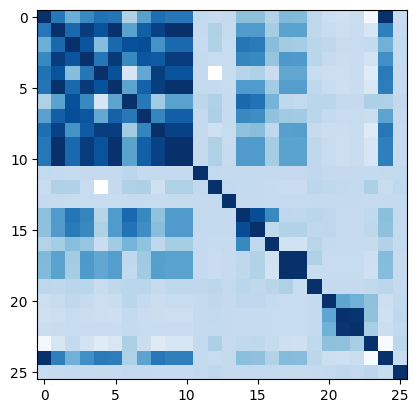

In [ ]:
plt.imshow(matrix, cmap='Blues') #Nothing for surfactants!

In [ ]:
from scipy.stats import pointbiserialr #Wanted to check corr() function was working with binary surfactant variable. Checked pointbiserialr() function with the surfactant variable and a couple of the other continuous variables and got the same values.

correlation, p_value = pointbiserialr(combined_molecules['surfactant'], combined_molecules['mw'])

print("Point-biserial correlation:", correlation)
print("P-value:", p_value)

Point-biserial correlation: -0.003954583913182282
P-value: 0.024215476220827988


In [ ]:
equal_amounts = pd.concat([(all_molecules.iloc[:285]), surfactants_286])  #select first 286 non-surfactants and combine with dataframe of 286 surfactants.
#Want to check correlation matrix when equal amounts of surfactants and non-surfactants

matrix_equal = equal_amounts.corr(numeric_only=True)

matrix_equal

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate,surfactant
cid,1.000000,0.315718,0.144295,0.214133,0.263493,0.313197,0.060333,0.220169,0.347699,0.315619,...,0.134807,0.360936,0.317562,0.171035,-0.068893,-0.078448,-0.060055,-0.319203,0.984443,0.311003
mw,0.315718,1.000000,0.860664,0.948254,0.019254,0.997187,0.722660,0.881670,0.878939,1.000000,...,0.189207,0.222043,0.230126,0.057263,-0.133614,-0.129689,-0.109946,-0.349302,0.363959,0.368546
polararea,0.144295,0.860664,1.000000,0.920969,-0.357488,0.862149,0.931433,0.924795,0.681676,0.860802,...,0.260774,0.103325,0.114495,0.016428,-0.076334,-0.101230,-0.085526,-0.212920,0.175057,0.062328
complexity,0.214133,0.948254,0.920969,1.000000,-0.127178,0.954289,0.822685,0.875929,0.747385,0.948337,...,0.183262,0.132457,0.138251,0.032819,-0.077670,-0.084582,-0.069148,-0.243803,0.250413,0.205820
xlogp,0.263493,0.019254,-0.357488,-0.127178,1.000000,0.029277,-0.425401,-0.255670,0.211776,0.019124,...,-0.184893,0.422180,0.376776,0.198881,-0.089314,-0.023281,-0.021643,-0.117990,0.285713,0.532801
heavycnt,0.313197,0.997187,0.862149,0.954289,0.029277,1.000000,0.726695,0.878741,0.878121,0.997199,...,0.179854,0.223873,0.231391,0.058608,-0.127813,-0.125091,-0.106180,-0.337707,0.360205,0.358339
hbonddonor,0.060333,0.722660,0.931433,0.822685,-0.425401,0.726695,1.000000,0.761325,0.542142,0.722792,...,0.234755,0.039835,0.059547,-0.014915,-0.051940,-0.070043,-0.059579,-0.123763,0.080835,-0.027611
hbondacc,0.220169,0.881670,0.924795,0.875929,-0.255670,0.878741,0.761325,1.000000,0.739573,0.881788,...,0.321518,0.160749,0.166712,0.041303,-0.107512,-0.127214,-0.105988,-0.288338,0.259575,0.136797
rotbonds,0.347699,0.878939,0.681676,0.747385,0.211776,0.878121,0.542142,0.739573,1.000000,0.878924,...,0.043687,0.352274,0.342420,0.122131,-0.134784,-0.112245,-0.095894,-0.322780,0.390738,0.452392
exactmass,0.315619,1.000000,0.860802,0.948337,0.019124,0.997199,0.722792,0.881788,0.878924,1.000000,...,0.189243,0.221986,0.230066,0.057251,-0.133565,-0.129667,-0.109927,-0.349237,0.363847,0.368386


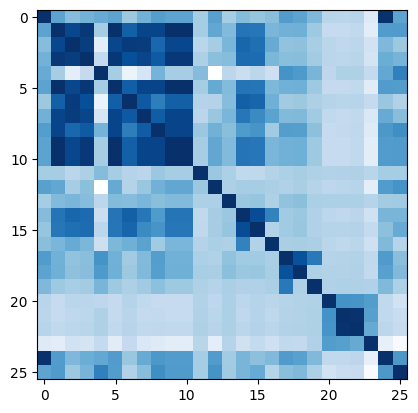

In [ ]:
plt.imshow(matrix_equal, cmap='Blues') #Some weak correlations

In [ ]:
correlation, p_value = stats.pointbiserialr(equal_amounts['surfactant'], equal_amounts['annothitcnt']) #Wanted to check corr() function was working with binary surfactant variable.

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: -0.505816407874183
P-value: 2.0201521679097258e-38
